<a href="https://colab.research.google.com/github/afif-af/hanson_ml_scikitlearn_tensorflow/blob/main/Chapter03handon_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)

In [140]:
x,y=mnist.data,mnist.target

In [141]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [142]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [143]:
x.shape

(70000, 784)

In [144]:
y.shape

(70000,)

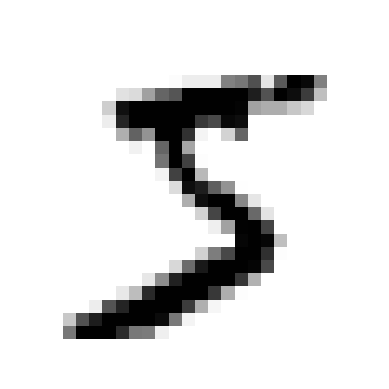

In [145]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=x[0]
plot_digit(some_digit)
plt.show()

In [146]:
y[0]

'5'

In [147]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [148]:
x_train.shape

(60000, 784)

In [149]:
x_test.shape

(10000, 784)

In [150]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [151]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [152]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [153]:
sgd_clf.predict([some_digit])

array([ True])

In [154]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [155]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [156]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [157]:
from sklearn.model_selection import StratifiedKFold


In [158]:
from sklearn.base import clone

In [159]:
skfolds=StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train[train_index]
  y_train_folds = y_train_5[train_index]
  x_test_fold = x_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred = clone_clf.predict(x_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [160]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [161]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [162]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [163]:
from sklearn.metrics import precision_score, recall_score

In [164]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [165]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [166]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [167]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [168]:
threshold=0

In [169]:
y_some_digit_pred= (y_scores > threshold)
y_some_digit_pred

array([ True])

In [170]:
threshold=300
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [171]:
y_scores=cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [172]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [173]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

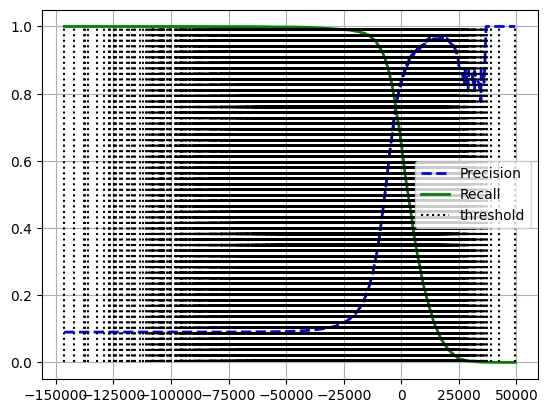

In [174]:
plt.plot(threshold, precisions[:-1],"b--",label="Precision",linewidth=2)
plt.plot(threshold, recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0, 1.0,"k","dotted",label="threshold")
plt.grid()
plt.legend()

plt.show()

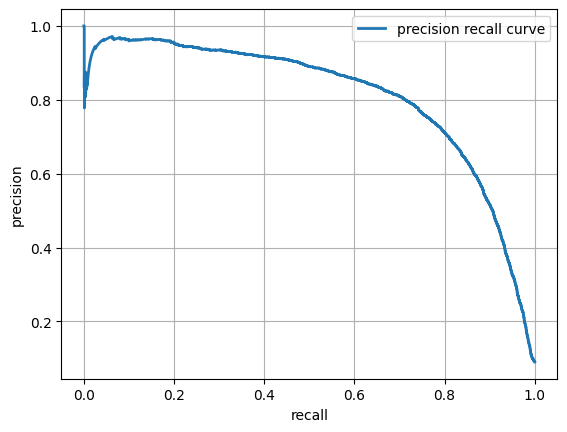

In [175]:
plt.plot(recalls,precisions,linewidth=2,label="precision recall curve")
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

In [176]:
idx_for_90_precision= (precisions>=0.90).argmax()
threshold_for_90_precision = threshold[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [177]:
Y_train_pred_90=(y_scores>=threshold_for_90_precision)

In [178]:
precision_score(y_train_5, Y_train_pred_90)


0.9000345901072293

In [179]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred)
recall_at_90_precision

0.6511713705958311

In [180]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_train_5, y_scores)

In [181]:
idx_for_threshold_at_90=(thresholds<=threshold_for_90_precision).argmax()
tpr_90, fpr_90= tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]



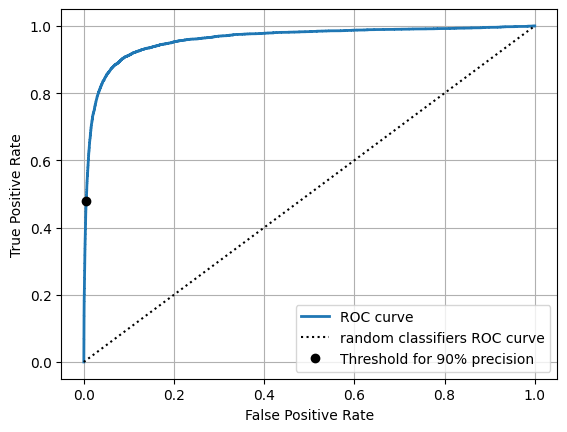

In [182]:
plt.plot(fpr, tpr, linewidth=2,label="ROC curve")
plt.plot([0,1],[0,1],'k:',label="random classifiers ROC curve")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [183]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [184]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)


In [185]:
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,method="predict_proba")

In [186]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [187]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

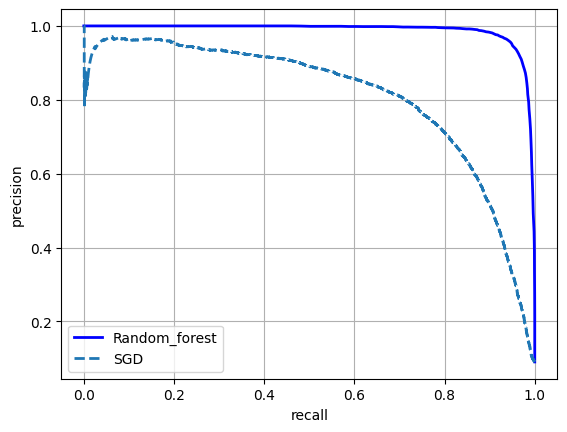

In [188]:
plt.plot(recalls_forest, precisions_forest,"b-", linewidth=2,label="Random_forest")
plt.plot(recalls, precisions, "--",linewidth=2, label="SGD")
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()


In [189]:
y_train_pred_forest = y_probas_forest[:, 1]>=0.5


In [190]:
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [191]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [192]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

In [192]:
svm_clf.predict([some_digit])

In [193]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [194]:
class_id=some_digit_scores.argmax()
class_id

np.int64(5)

In [195]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [196]:
svm_clf.classes_[class_id]

'5'

In [197]:
from sklearn.multiclass import OneVsRestClassifier


In [198]:
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [199]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [200]:
len(ovr_clf.estimators_)

10

In [201]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [202]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [203]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [204]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [207]:
import numpy as np


In [208]:
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [209]:
from sklearn.metrics import ConfusionMatrixDisplay


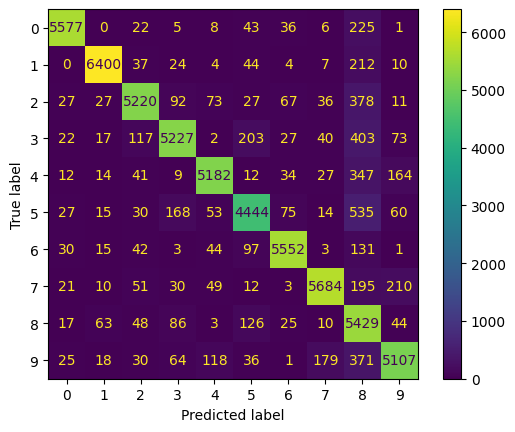

In [210]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

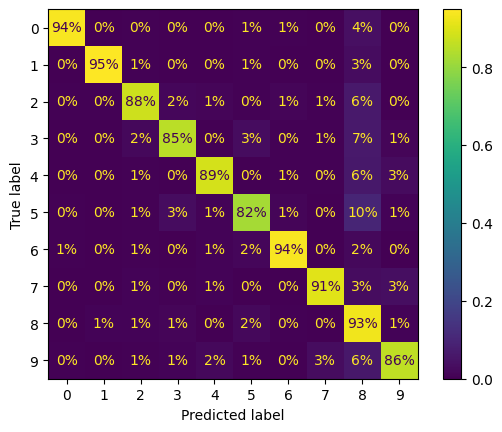

In [211]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",values_format=".0%")
plt.show()

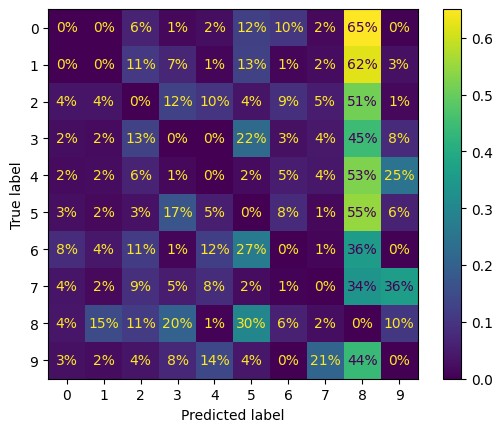

In [212]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

In [ ]:
cl_a,cl_b='3';'5'
x_aa=x_train[(y_train==cl_a)] & (y_train_pred==cl_a)
x_ab=x_train[(y_train==cl_a)] & (y_train_pred==cl_b)
x_ba=x_train[(y_train==cl_b)] & (y_train_pred==cl_a)
x_bb=x_train[(y_train==cl_b)] & (y_train_pred==cl_b)

[...]

In [213]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [214]:
y_train_large=(y_train>='7')
y_train_odd=(y_train.astype('int8')%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

In [215]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [216]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf=